<a href="https://colab.research.google.com/github/xhxuciedu/CS175/blob/master/pytorch-tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import sys
import torch 
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

### Check Package Versions

In [2]:
print('__Python VERSION:', sys.version)
print('__PyTorch VERSION:', torch.__version__)
print('__CUDNN VERSION:', torch.backends.cudnn.version())
print('__Number CUDA Devices:', torch.cuda.device_count())

__Python VERSION: 3.7.4 (default, Aug 13 2019, 20:35:49) 
[GCC 7.3.0]
__PyTorch VERSION: 1.3.1
__CUDNN VERSION: 7603
__Number CUDA Devices: 2


### PyTorch
What is PyTorch?

It’s a Python based scientific computing package targeted at two sets of audiences:

* A replacement for numpy to use the power of GPUs
* a deep learning research platform that provides maximum flexibility and speed





### Tensors

Tensors are similar to numpy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.


Construct a 5x3 matrix, uninitialized

In [3]:
x = torch.Tensor(5, 3)
print(x)

tensor([[1.7538e+16, 4.5841e-41, 1.7538e+16],
        [4.5841e-41,        nan, 3.0812e-41],
        [1.7753e+28, 4.4339e+27, 5.6719e-11],
        [7.3471e+28, 2.6383e+23, 2.7376e+20],
        [1.8040e+28, 1.8750e-19, 7.3909e+22]])


In [4]:
# get its size
y = torch.rand(5, 3)
print(x + y)

tensor([[1.7538e+16, 8.5489e-01, 1.7538e+16],
        [9.7539e-01,        nan, 6.0941e-01],
        [1.7753e+28, 4.4339e+27, 4.3494e-01],
        [7.3471e+28, 2.6383e+23, 2.7376e+20],
        [1.8040e+28, 4.3459e-02, 7.3909e+22]])


In [5]:
# Addition: in-place
y.add_(x)

tensor([[1.7538e+16, 8.5489e-01, 1.7538e+16],
        [9.7539e-01,        nan, 6.0941e-01],
        [1.7753e+28, 4.4339e+27, 4.3494e-01],
        [7.3471e+28, 2.6383e+23, 2.7376e+20],
        [1.8040e+28, 4.3459e-02, 7.3909e+22]])

### Create tensors

In [6]:
# random
v = torch.rand(2, 3)            # Initialize with random number (uniform distribution)
v = torch.randn(2, 3)           # With normal distribution (SD=1, mean=0)
v = torch.randperm(4)   

# ones
eye = torch.eye(3)              # Create an identity 3x3 tensor
v = torch.ones(10)              # A tensor of size 10 containing all ones
v = torch.ones(2, 1, 2, 1)      # Size 2x1x2x1
v = torch.ones_like(eye)        # A tensor with same shape as eye. Fill it with 1.

# zeros
v = torch.zeros(10) 

# range of values
v = torch.arange(5)             # similar to range(5) but creating a Tensor
v = torch.arange(0, 5, step=1)  # Size 5. Similar to range(0, 5, 1)

# linear or log scale
v = torch.linspace(1, 10, steps=10) # Create a Tensor with 10 linear points for (1, 10) inclusively
v = torch.logspace(start=-10, end=10, steps=5) # Size 5: 1.0e-10 1.0e-05 1.0e+00, 1.0e+05, 1.0e+10

### Dot product, component-wide product, matrix multiplication, 

In [7]:
# Dot product of 2 tensors
r = torch.dot(torch.Tensor([4, 2]), torch.Tensor([3, 1])) # 14

In [8]:
# component-wise product
torch.Tensor([4, 2])* torch.Tensor([3, 1])

tensor([12.,  2.])

In [9]:
# Matrix x Matrix
# Size 2x4
mat1 = torch.randn(2, 3)
mat2 = torch.randn(3, 4)
r = torch.mm(mat1, mat2)

In [10]:
# Batch Matrix x Matrix
# Size 10x3x5
batch1 = torch.randn(10, 3, 4)
batch2 = torch.randn(10, 4, 5)
r = torch.bmm(batch1, batch2)

###Squeeze and unsqueeze

In [11]:
t = torch.ones(2,1,2,1) # Size 2x1x2x1
r = torch.squeeze(t)     # Size 2x2
r = torch.squeeze(t, 1)  # Squeeze dimension 1: Size 2x2x1

# Un-squeeze a dimension
x = torch.Tensor([1, 2, 3])
r = torch.unsqueeze(x, 0)       # Size: 1x3
r = torch.unsqueeze(x, 1)       # Size: 3x1

### Transpose


In [12]:
# Transpose dim 0 and 1
v = torch.randn(3,2)
r = torch.transpose(v, 0, 1)
print(r.shape)

torch.Size([2, 3])


### Numpy Bridge
Converting a torch Tensor to a numpy array and vice versa is a breeze.

The torch Tensor and numpy array will share their underlying memory locations, and changing one will change the other.

Converting torch Tensor to numpy Array

In [13]:
# Create a numpy array.
x = np.array([[1, 2], [3, 4]])

# Convert the numpy array to a torch tensor.
y = torch.from_numpy(x)

# Convert the torch tensor to a numpy array.
z = y.numpy()

In [14]:
x

array([[1, 2],
       [3, 4]])

In [15]:
y

tensor([[1, 2],
        [3, 4]])

In [16]:
z

array([[1, 2],
       [3, 4]])

In [17]:
# Conversion
a = np.array([1, 2, 3])
v = torch.from_numpy(a)         # Convert a numpy array to a Tensor

b = v.numpy()                   # Tensor to numpy
b[1] = -1                       # Numpy and Tensor share the same memory
assert(a[1] == b[1])            # Change Numpy will also change the Tensor

### Reshape tensor

In [18]:
### Tensor resizing
x = torch.randn(2, 3)            # Size 2x3
y = x.view(6)                    # Resize x to size 6
z = x.view(-1, 2)                # Size 3x2
print(y.shape, z.shape)

torch.Size([6]) torch.Size([3, 2])


### CUDA Tensors

All the Tensors on the CPU except a CharTensor support converting to NumPy and back.


Tensors can be moved onto GPU using the .cuda function.

In [19]:
# let us run this cell only if CUDA is available

x = torch.rand(3,2)
y = torch.rand(3,2)
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    x + y

RuntimeError: CUDA error: no kernel image is available for execution on the device

In [20]:
torch.cuda.is_available()

True

In [21]:
y

RuntimeError: CUDA error: no kernel image is available for execution on the device

## Autograd: automatic differentiation

Central to all neural networks in PyTorch is autograd, a core torch package for automatic differentiation. 


The autograd package provides automatic differentiation for all operations on Tensors. It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different.

Let us see this in more simple terms with some examples.

In [56]:
x = torch.from_numpy(np.array(0.5))

In [57]:
x.requires_grad=True

In [60]:
y = torch.exp(x)**2 + x**3 + 1

In [61]:
y.backward()

In [62]:
x.grad

tensor(6.1866, dtype=torch.float64)

In [63]:
a = 0.5
2*np.exp(2*a) + 3*a**2

6.18656365691809

In [19]:
# create an variable
x = torch.ones((2,2), requires_grad=True)

# Do an operation of variable:
y = x + 2

# Do more operations on y
z = y * y * 3
out = z.mean()

In [20]:
# Gradients
# ---------
# let's backprop now
# ``out.backward()`` is equivalent to doing ``out.backward(torch.Tensor([1.0]))``
out.backward()

In [21]:
###############################################################
# print gradients d(out)/dx
#

print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


You should have got a matrix of ``4.5``. Let’s call the ``out`` *Variable* $o$.
We have that: $o = \frac{1}{4}\sum_i z_i$, 
$z_i = 3(x_i+2)^2$ and $z_i\bigr\rvert_{x_i=1} = 27$

Therefore,
$$\frac{\partial o}{\partial x_i} = \frac{3}{2}(x_i+2)$$ hence
$$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5$$

In [22]:
# You can do many crazy things with autograd!
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([1015.6940, -161.6257,  296.3340], grad_fn=<MulBackward0>)


In [23]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


### Basic autograd example 1 

In [22]:
# Create tensors.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

In [23]:
# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

In [24]:
# Compute gradients.
y.backward()

In [25]:
# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 

tensor(2.)
tensor(1.)
tensor(1.)


In [26]:
y.detach().numpy()

array(5., dtype=float32)

### Basic autograd example 2  

In [27]:
# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)
print(x.shape, y.shape)

torch.Size([10, 3]) torch.Size([10, 2])


In [28]:
# Build a fully connected layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

w:  Parameter containing:
tensor([[-0.2242, -0.2210,  0.3245],
        [-0.0678,  0.0498,  0.1001]], requires_grad=True)
b:  Parameter containing:
tensor([0.5315, 0.5363], requires_grad=True)


In [29]:
loss = torch.sum((linear(x)-y)**2)/y.shape[0]
print('loss: ', loss.data.numpy())

loss:  2.8821466


In [30]:
loss.backward()

In [31]:
print('w grad: ', linear.weight.grad)
print('b grad: ', linear.bias.grad)

w grad:  tensor([[-0.4736,  0.3018,  0.5318],
        [ 0.3659,  0.7317, -2.5731]])
b grad:  tensor([0.3028, 1.7071])


In [32]:
# check grad
print('w grad:', (linear(x)-y).transpose(0,1).mm(x)/y.shape[0]*2)
print('b grad:', 2*torch.mean(linear(x)-y, dim=0))

w grad: tensor([[-0.4736,  0.3018,  0.5318],
        [ 0.3659,  0.7317, -2.5731]], grad_fn=<MulBackward0>)
b grad: tensor([0.3028, 1.7071], grad_fn=<MulBackward0>)


### Basic autograd example 3

In [65]:
x.shape

torch.Size([10, 5])

In [66]:
y.shape

torch.Size([10, 1])

In [67]:
linear(x)

tensor([[ 0.3589],
        [-0.4504],
        [-0.7876],
        [-1.0495],
        [-0.2466],
        [-0.8219],
        [ 1.1638],
        [ 0.1614],
        [-0.5188],
        [ 0.4271]], grad_fn=<AddmmBackward>)

In [85]:
print(list(linear.parameters()))

[Parameter containing:
tensor([[-0.3702, -0.3036, -0.0686,  0.2767, -0.4281]], requires_grad=True), Parameter containing:
tensor([-0.1815], requires_grad=True)]


In [86]:
linear(x)

tensor([[ 0.3589],
        [-0.4504],
        [-0.7876],
        [-1.0495],
        [-0.2466],
        [-0.8219],
        [ 1.1638],
        [ 0.1614],
        [-0.5188],
        [ 0.4271]], grad_fn=<AddmmBackward>)

In [90]:
loss = torch.mean((linear(x)-y)**2)

In [92]:
loss.backward()

In [94]:
linear.weight.grad

tensor([[-1.8513,  0.8291,  1.1212, -0.4436,  0.2369]])

In [95]:
linear.bias.grad

tensor([-0.3846])

In [110]:
# Create tensors of shape (10, 5) and (10, 1).
x = torch.randn(10, 5)
y = torch.randn(10, 1)
linear = nn.Linear(5, 1)

In [111]:
# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.001)

In [112]:
for i in range(200):
    # Forward pass.
    pred = linear(x)

    # Compute loss.
    loss = criterion(pred, y)
    #print('loss: ', loss.item())

    # Backward pass.
    loss.backward()

    # Print out the gradients.
    #print ('dL/dw: ', linear.weight.grad) 
    #print ('dL/db: ', linear.bias.grad)

    # 1-step gradient descent.
    optimizer.step()

    # You can also perform gradient descent at the low level.
    # linear.weight.data.sub_(0.01 * linear.weight.grad.data)
    # linear.bias.data.sub_(0.01 * linear.bias.grad.data)

    # Print out the loss after 1-step gradient descent.
    #pred = linear(x)
    #loss = criterion(pred, y)
    print('loss after {} step optimization: '.format(i), loss.item())

loss after 0 step optimization:  1.2756935358047485
loss after 1 step optimization:  1.2700201272964478
loss after 2 step optimization:  1.2587554454803467
loss after 3 step optimization:  1.242061972618103
loss after 4 step optimization:  1.2201799154281616
loss after 5 step optimization:  1.1934243440628052
loss after 6 step optimization:  1.162179708480835
loss after 7 step optimization:  1.1268935203552246
loss after 8 step optimization:  1.088070034980774
loss after 9 step optimization:  1.046262502670288
loss after 10 step optimization:  1.0020638704299927
loss after 11 step optimization:  0.9560983777046204
loss after 12 step optimization:  0.9090119004249573
loss after 13 step optimization:  0.8614616990089417
loss after 14 step optimization:  0.814106822013855
loss after 15 step optimization:  0.7675976753234863
loss after 16 step optimization:  0.7225669026374817
loss after 17 step optimization:  0.679619550704956
loss after 18 step optimization:  0.6393237113952637
loss afte

## Input pipeline, Data loader

In [46]:
# Download and construct CIFAR-10 dataset.
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True, 
                                             transform=transforms.ToTensor(),
                                             download=True)

# Fetch one data pair (read data from disk).
image, label = train_dataset[0]
print (image.size())
print (label)

# Data loader (this provides queues and threads in a very simple way).
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

# When iteration starts, queue and thread start to load data from files.
data_iter = iter(train_loader)

# Mini-batch images and labels.
images, labels = data_iter.next()

# Actual usage of the data loader is as below.
for images, labels in train_loader:
    # Training code should be written here.
    pass

Files already downloaded and verified
torch.Size([3, 32, 32])
6


In [113]:
train_dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [114]:
images.shape

torch.Size([64, 3, 32, 32])

In [115]:
labels

tensor([1, 9, 9, 0, 6, 9, 9, 2, 7, 4, 8, 0, 4, 6, 6, 4, 6, 0, 6, 0, 5, 3, 1, 4,
        6, 7, 0, 5, 7, 6, 4, 9, 3, 6, 7, 0, 3, 4, 2, 3, 9, 1, 2, 1, 3, 5, 4, 9,
        5, 7, 0, 4, 9, 0, 3, 1, 4, 1, 5, 9, 3, 2, 1, 3])

  cat airplane   dog horse   cat  ship   dog airplane  frog truck


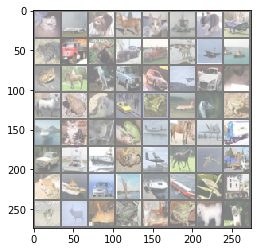

In [116]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

import builtins

# get some random training images
dataiter = builtins.iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % train_dataset.classes[labels[j]] for j in range(10)))

### Input pipeline for custom dataset

In [38]:
# ================================================================== #
#                  Input pipeline for custom dataset                 #
# ================================================================== #

# You should build your custom dataset as below.
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self):
        # TODO
        # 1. Initialize file paths or a list of file names. 
        pass
    def __getitem__(self, index):
        # TODO
        # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).
        # 2. Preprocess the data (e.g. torchvision.Transform).
        # 3. Return a data pair (e.g. image and label).
        pass
    def __len__(self):
        # You should change 0 to the total size of your dataset.
        return 0 

# You can then use the prebuilt data loader. 
custom_dataset = CustomDataset()
train_loader = torch.utils.data.DataLoader(dataset=custom_dataset,
                                           batch_size=64, 
                                           shuffle=True)


ValueError: num_samples should be a positive integer value, but got num_samples=0

### Pretrained model

In [ ]:
# ================================================================== #
#                           Pretrained model                         #
# ================================================================== #

# Download and load the pretrained ResNet-18.
resnet = torchvision.models.resnet18(pretrained=True)

# If you want to finetune only the top layer of the model, set as below.
for param in resnet.parameters():
    param.requires_grad = False

# Replace the top layer for finetuning.
resnet.fc = nn.Linear(resnet.fc.in_features, 100)  # 100 is an example.

# Forward pass.
images = torch.randn(64, 3, 224, 224)
outputs = resnet(images)
print (outputs.size())     # (64, 100)

### Save and load the model    

In [ ]:
# Save and load the entire model.
torch.save(resnet, 'model.ckpt')
model = torch.load('model.ckpt')

# Save and load only the model parameters (recommended).
torch.save(resnet.state_dict(), 'params.ckpt')
resnet.load_state_dict(torch.load('params.ckpt'))